In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.tail(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
585,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N
586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
590,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
# Assuming df is your DataFrame
# First, let's get the value counts of the existing genders
gender_counts = df["Gender"].value_counts()

# Next, let's get the number of missing values in the Gender column
missing_count = df["Gender"].isnull().sum()

# Now, let's generate random genders based on the existing distribution
random_genders = np.random.choice(gender_counts.index, size=missing_count, p=gender_counts.values / gender_counts.values.sum())

# Finally, let's fill the missing values with the random genders
df.loc[df["Gender"].isnull(), "Gender"] = random_genders


<Axes: xlabel='Gender', ylabel='count'>

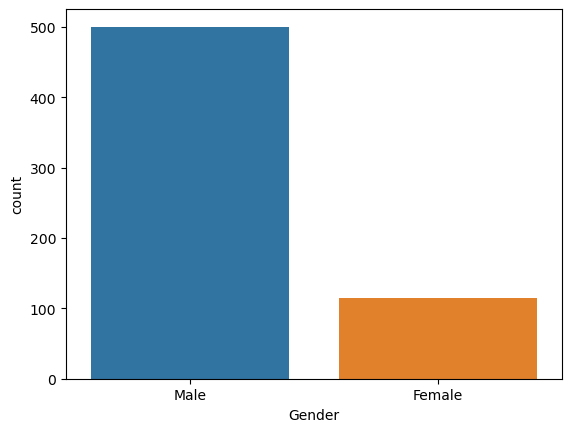

In [9]:
sns.countplot(x="Gender" , data = df)

In [10]:
df["Gender"].value_counts()

Male      500
Female    114
Name: Gender, dtype: int64

In [11]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df["Married"] = df["Married"].fillna("Yes")

In [13]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [14]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

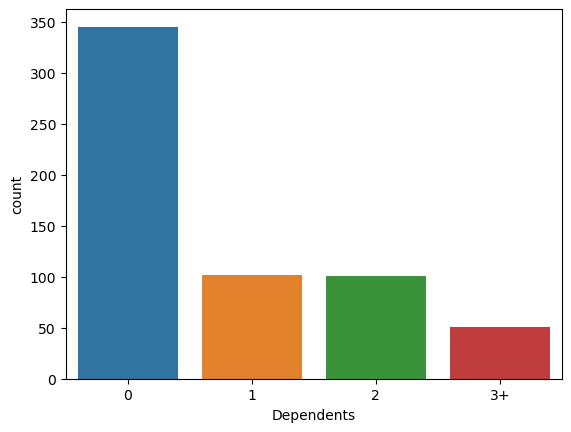

In [15]:
sns.countplot(x="Dependents" , data = df)

In [16]:
# Assuming df is your DataFrame
# Grouping the "Dependents" column
df["Dependents_Group"] = df["Dependents"].apply(lambda x: "0" if x == "0" else "1+")

# Printing the value counts of the new grouped column
print(df["Dependents_Group"].value_counts())

0     345
1+    269
Name: Dependents_Group, dtype: int64


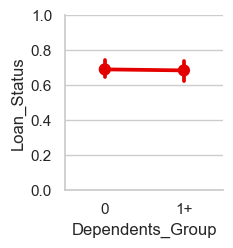

In [17]:
import seaborn as sns

# Convert Loan_Status to numeric if it's not already numeric
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

# Plotting
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Dependents_Group'], y_vars='Loan_Status')
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))


In [18]:
# Remove rows with null values in the "Dependents" column
df.dropna(subset=['Dependents'], inplace=True)


In [19]:
print(df["Dependents"].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [20]:
# Remove the "Dependents" column
df.drop(columns=['Dependents'], inplace=True)


In [21]:
df["Self_Employed"].value_counts()

No     487
Yes     80
Name: Self_Employed, dtype: int64

In [22]:
df["Self_Employed"] = df["Self_Employed"].fillna("No")

In [23]:
df["Self_Employed"].value_counts()

No     519
Yes     80
Name: Self_Employed, dtype: int64

In [24]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [25]:
df["LoanAmount"].describe()

count    579.000000
mean     146.816926
std       86.343049
min        9.000000
25%      100.000000
50%      128.000000
75%      169.000000
max      700.000000
Name: LoanAmount, dtype: float64

/var/folders/tx/ys48hjmx6d1_170rbcjfjg7m0000gn/T/ipykernel_3663/3845664682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

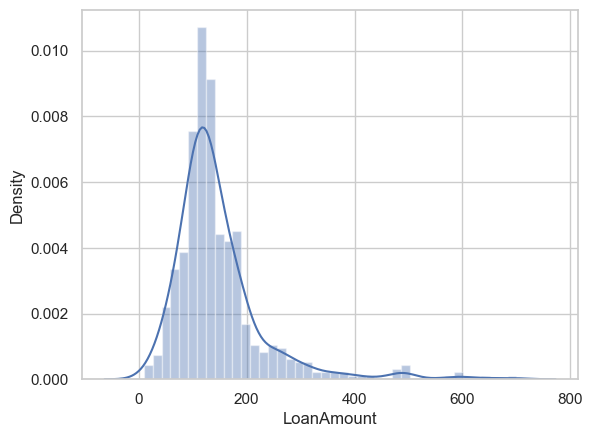

In [26]:
sns.distplot(df["LoanAmount"])

In [27]:
df["LoanAmount"] = df["LoanAmount"].interpolate()

In [28]:
df["LoanAmount"].describe()

count    598.000000
mean     147.372910
std       86.451116
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

/var/folders/tx/ys48hjmx6d1_170rbcjfjg7m0000gn/T/ipykernel_3663/3845664682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

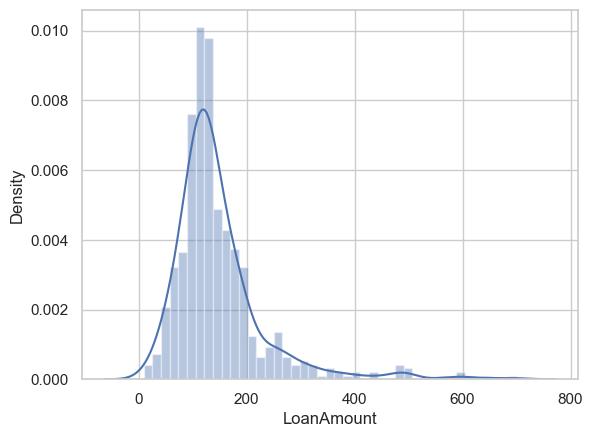

In [29]:
sns.distplot(df["LoanAmount"])

In [30]:
df.dropna(subset=['LoanAmount'], inplace=True)

In [31]:
df["Loan_Amount_Term"].value_counts()

360.0    501
180.0     43
300.0     13
480.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
df["Loan_Amount_Term"].describe()

count    585.000000
mean     341.641026
std       64.925993
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [33]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].interpolate()

In [34]:
df["Loan_Amount_Term"].describe()

count    598.000000
mean     341.789298
std       64.469819
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [35]:
df["Credit_History"].value_counts()

1.0    464
0.0     84
Name: Credit_History, dtype: int64

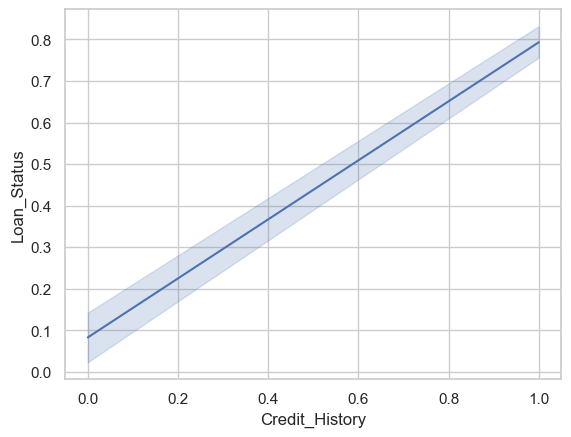

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting a line plot
sns.lineplot(data=df, x='Credit_History', y='Loan_Status')

# Setting grid
plt.grid(True)

# Show plot
plt.show()


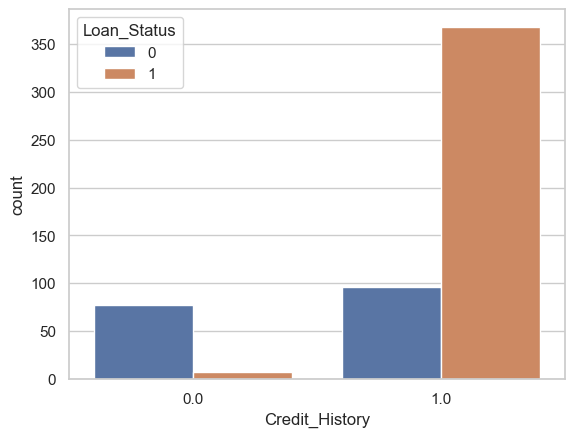

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting a count plot
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

# Show plot
plt.show()


In [38]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame containing the "Credit_History" column

# Calculate the probabilities of each unique value
value_counts = df['Credit_History'].value_counts(normalize=True)

# Calculate the number of missing values
num_missing = df['Credit_History'].isnull().sum()

# Sample from the existing values based on their probabilities
imputed_values = np.random.choice(value_counts.index, size=num_missing, p=value_counts.values)

# Assign the imputed values to the missing entries
df.loc[df['Credit_History'].isnull(), 'Credit_History'] = imputed_values

# Check if there are any missing values left
print(df['Credit_History'].isnull().sum())


0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    int64  
 12  Dependents_Group   598 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 65.4+ KB


In [40]:
df["Credit_History"].value_counts()

1.0    507
0.0     91
Name: Credit_History, dtype: int64

In [41]:
import pandas as pd

# Assuming df is your DataFrame

# Define a lambda function to map values to categories
category_mapper = lambda x: 'Yes' if x == 1.0 else 'No'

# Apply the lambda function to the Credit_History column
df['Credit_History_Category'] = df['Credit_History'].map(category_mapper)

# Display the value counts of the new column
print(df['Credit_History_Category'].value_counts())


Yes    507
No      91
Name: Credit_History_Category, dtype: int64


In [42]:
df["Credit_History"].value_counts()

1.0    507
0.0     91
Name: Credit_History, dtype: int64

In [43]:
df.drop(columns=['Credit_History'], inplace=True)

In [44]:
df.head(5)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Dependents_Group,Credit_History_Category
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,Rural,0,1+,Yes
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,Urban,1,0,Yes
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,1,0,Yes
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,Urban,1,0,Yes
5,LP001011,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,1,1+,Yes


/var/folders/tx/ys48hjmx6d1_170rbcjfjg7m0000gn/T/ipykernel_3663/1607142254.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome"])


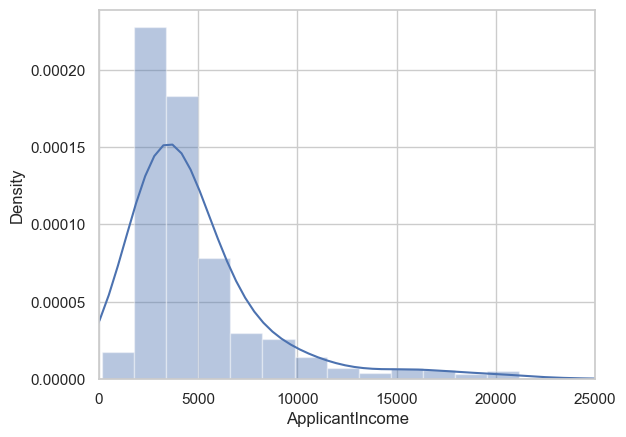

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.distplot(df["ApplicantIncome"])
plt.xlim(0, 25000)
plt.show()


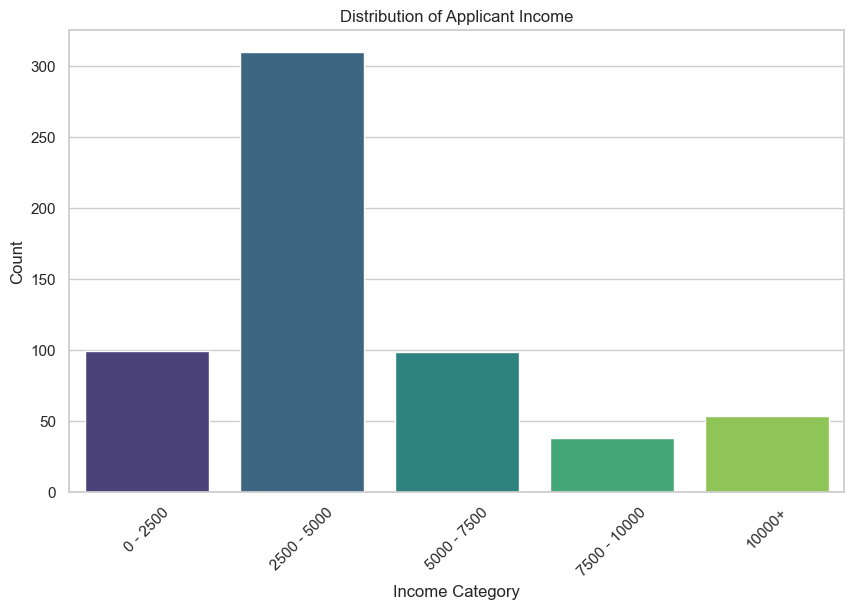

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the income categories
income_bins = [0, 2500, 5000, 7500, 10000, float('inf')]
income_labels = ['0 - 2500', '2500 - 5000', '5000 - 7500', '7500 - 10000', '10000+']

# Add a new column to the DataFrame with income categories
df['Income_Category'] = pd.cut(df['ApplicantIncome'], bins=income_bins, labels=income_labels, right=False)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income_Category', order=income_labels, palette='viridis')
plt.title('Distribution of Applicant Income')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [47]:
df.drop(columns=['ApplicantIncome'], inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Loan_ID                  598 non-null    object  
 1   Gender                   598 non-null    object  
 2   Married                  598 non-null    object  
 3   Education                598 non-null    object  
 4   Self_Employed            598 non-null    object  
 5   CoapplicantIncome        598 non-null    float64 
 6   LoanAmount               598 non-null    float64 
 7   Loan_Amount_Term         598 non-null    float64 
 8   Property_Area            598 non-null    object  
 9   Loan_Status              598 non-null    int64   
 10  Dependents_Group         598 non-null    object  
 11  Credit_History_Category  598 non-null    object  
 12  Income_Category          598 non-null    category
dtypes: category(1), float64(3), int64(1), object(8)
memory usage: 61.

/var/folders/tx/ys48hjmx6d1_170rbcjfjg7m0000gn/T/ipykernel_3663/3744605044.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


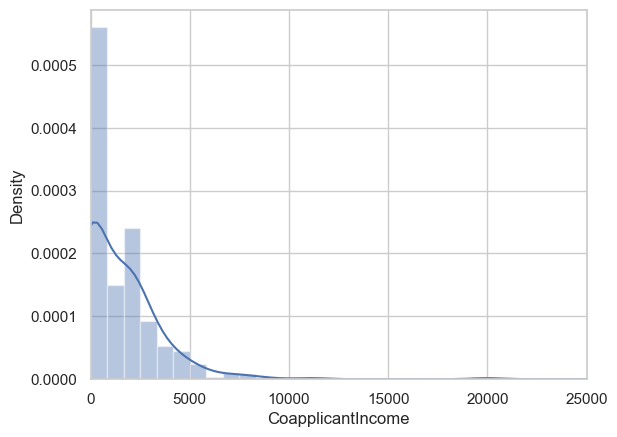

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.distplot(df["CoapplicantIncome"])
plt.xlim(0, 25000)
plt.show()


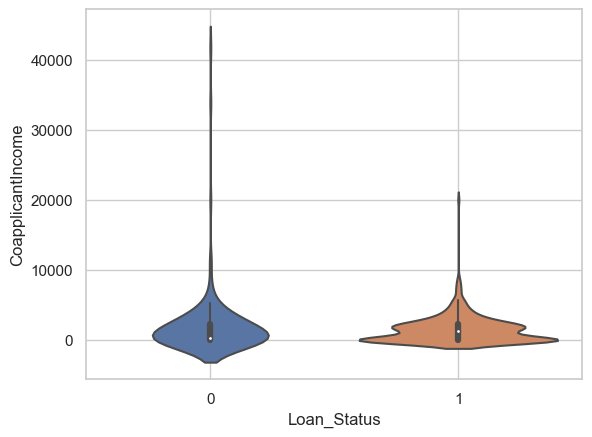

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a violin plot
sns.violinplot(data=df, x='Loan_Status', y='CoapplicantIncome')

# Setting grid
plt.grid(True)

# Show plot
plt.show()



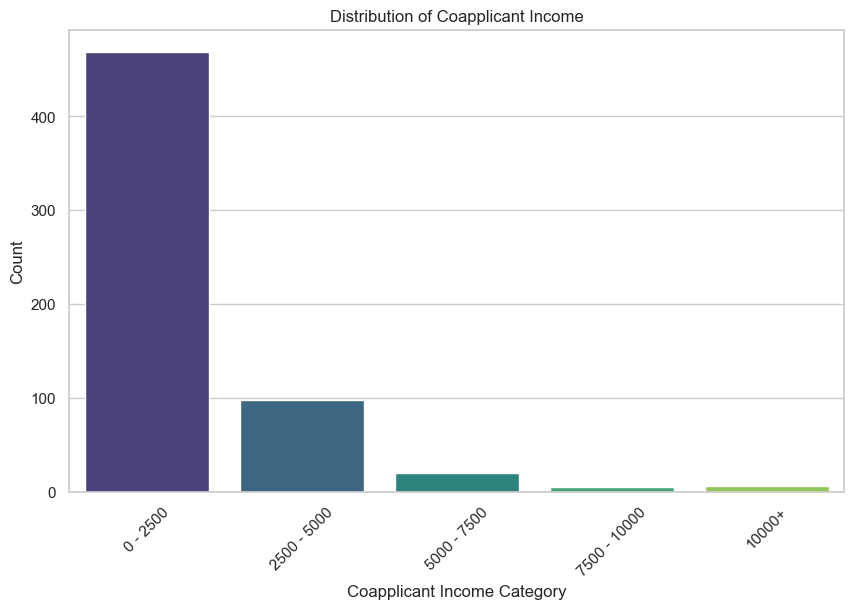

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the income categories
income_bins = [0, 2500, 5000, 7500, 10000, float('inf')]
income_labels = ['0 - 2500', '2500 - 5000', '5000 - 7500', '7500 - 10000', '10000+']

# Add a new column to the DataFrame with income categories for CoapplicantIncome
df['CoapplicantIncome_Category'] = pd.cut(df['CoapplicantIncome'], bins=income_bins, labels=income_labels, right=False)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CoapplicantIncome_Category', order=income_labels, palette='viridis')
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [52]:
df.drop(columns=['CoapplicantIncome'], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Loan_ID                     598 non-null    object  
 1   Gender                      598 non-null    object  
 2   Married                     598 non-null    object  
 3   Education                   598 non-null    object  
 4   Self_Employed               598 non-null    object  
 5   LoanAmount                  598 non-null    float64 
 6   Loan_Amount_Term            598 non-null    float64 
 7   Property_Area               598 non-null    object  
 8   Loan_Status                 598 non-null    int64   
 9   Dependents_Group            598 non-null    object  
 10  Credit_History_Category     598 non-null    object  
 11  Income_Category             598 non-null    category
 12  CoapplicantIncome_Category  598 non-null    category
dtypes: category(2), floa

In [54]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Dependents_Group,Credit_History_Category,Income_Category,CoapplicantIncome_Category
1,LP001003,Male,Yes,Graduate,No,128.0,360.0,Rural,0,1+,Yes,2500 - 5000,0 - 2500
2,LP001005,Male,Yes,Graduate,Yes,66.0,360.0,Urban,1,0,Yes,2500 - 5000,0 - 2500
3,LP001006,Male,Yes,Not Graduate,No,120.0,360.0,Urban,1,0,Yes,2500 - 5000,0 - 2500
4,LP001008,Male,No,Graduate,No,141.0,360.0,Urban,1,0,Yes,5000 - 7500,0 - 2500
5,LP001011,Male,Yes,Graduate,Yes,267.0,360.0,Urban,1,1+,Yes,5000 - 7500,2500 - 5000


/var/folders/tx/ys48hjmx6d1_170rbcjfjg7m0000gn/T/ipykernel_3663/1004890856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"])


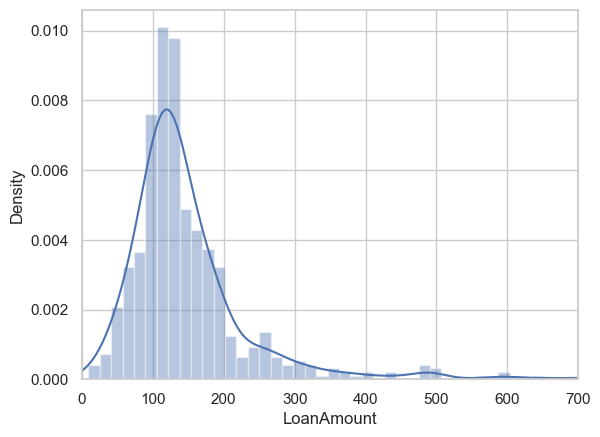

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.distplot(df["LoanAmount"])
plt.xlim(0, 700)
plt.show()

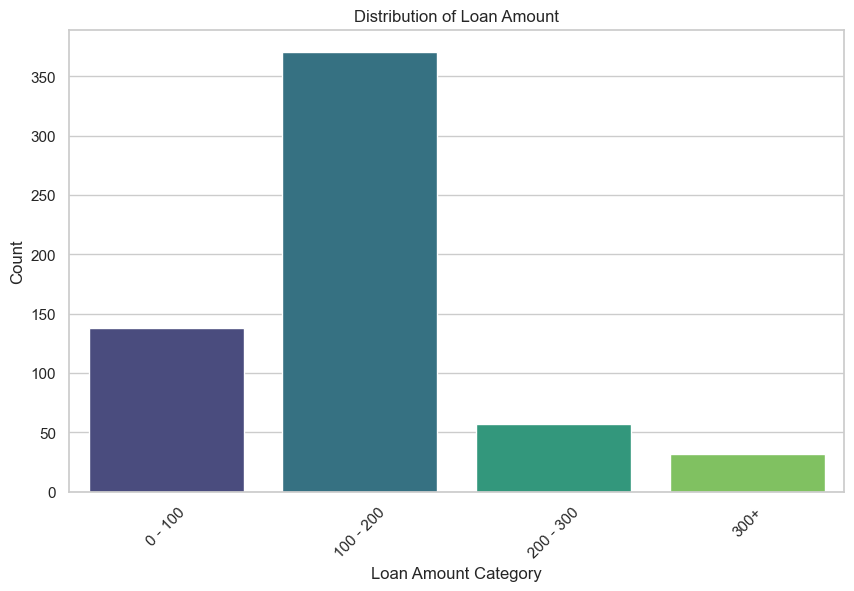

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the loan amount categories
loan_bins = [0, 100, 200, 300, float('inf')]
loan_labels = ['0 - 100', '100 - 200', '200 - 300', '300+']

# Add a new column to the DataFrame with loan amount categories
df['LoanAmount_Category'] = pd.cut(df['LoanAmount'], bins=loan_bins, labels=loan_labels, right=False)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='LoanAmount_Category', order=loan_labels, palette='viridis')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [57]:
df.drop(columns=['LoanAmount'], inplace=True)

In [58]:
df["Loan_Amount_Term"].value_counts()

360.0    510
180.0     43
300.0     13
480.0     13
84.0       4
120.0      3
240.0      3
60.0       2
270.0      2
36.0       2
330.0      1
420.0      1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [59]:
df.drop(columns=['Loan_Amount_Term'], inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Loan_ID                     598 non-null    object  
 1   Gender                      598 non-null    object  
 2   Married                     598 non-null    object  
 3   Education                   598 non-null    object  
 4   Self_Employed               598 non-null    object  
 5   Property_Area               598 non-null    object  
 6   Loan_Status                 598 non-null    int64   
 7   Dependents_Group            598 non-null    object  
 8   Credit_History_Category     598 non-null    object  
 9   Income_Category             598 non-null    category
 10  CoapplicantIncome_Category  598 non-null    category
 11  LoanAmount_Category         598 non-null    category
dtypes: category(3), int64(1), object(8)
memory usage: 49.1+ KB


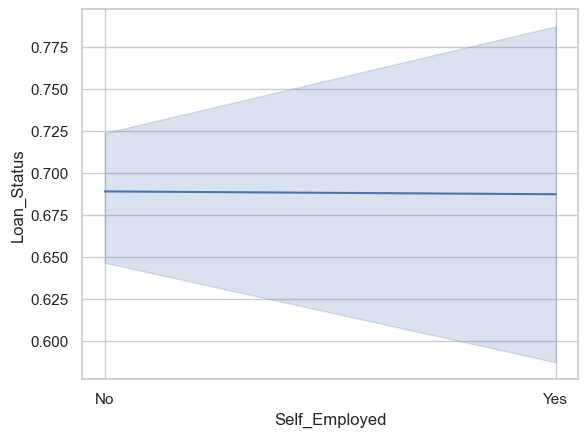

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting a line plot
sns.lineplot(data=df, x='Self_Employed', y='Loan_Status')

# Setting grid
plt.grid(True)

# Show plot
plt.show()

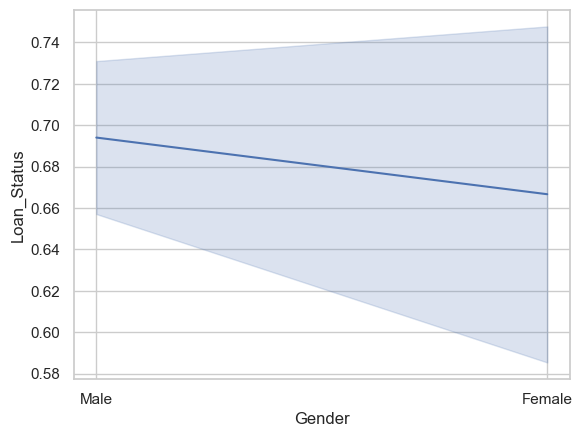

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting a line plot
sns.lineplot(data=df, x='Gender', y='Loan_Status')

# Setting grid
plt.grid(True)

# Show plot
plt.show()

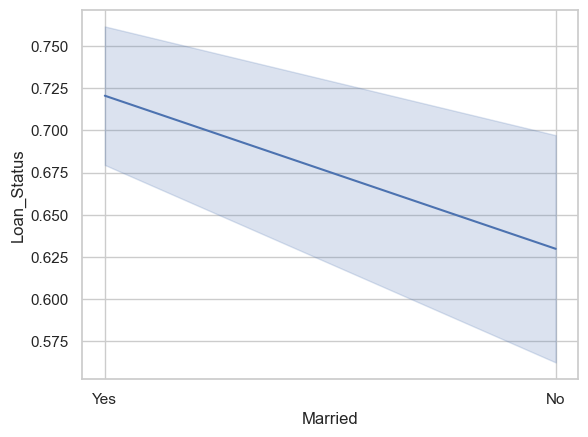

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting a line plot
sns.lineplot(data=df, x='Married', y='Loan_Status')

# Setting grid
plt.grid(True)

# Show plot
plt.show()

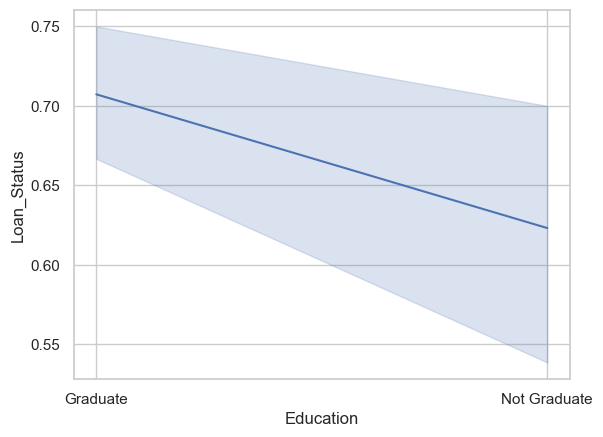

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting a line plot
sns.lineplot(data=df, x='Education', y='Loan_Status')

# Setting grid
plt.grid(True)

# Show plot
plt.show()

In [65]:
df.drop(columns=['Loan_ID'], inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 613
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Gender                      598 non-null    object  
 1   Married                     598 non-null    object  
 2   Education                   598 non-null    object  
 3   Self_Employed               598 non-null    object  
 4   Property_Area               598 non-null    object  
 5   Loan_Status                 598 non-null    int64   
 6   Dependents_Group            598 non-null    object  
 7   Credit_History_Category     598 non-null    object  
 8   Income_Category             598 non-null    category
 9   CoapplicantIncome_Category  598 non-null    category
 10  LoanAmount_Category         598 non-null    category
dtypes: category(3), int64(1), object(7)
memory usage: 44.4+ KB


In [67]:
df = pd.get_dummies(df, prefix='is')

                 Loan_Status  is_Female   is_Male     is_No    is_Yes  \
Loan_Status         1.000000  -0.022995  0.022995 -0.093323  0.093323   
is_Female          -0.022995   1.000000 -1.000000  0.355723 -0.355723   
is_Male             0.022995  -1.000000  1.000000 -0.355723  0.355723   
is_No              -0.093323   0.355723 -0.355723  1.000000 -1.000000   
is_Yes              0.093323  -0.355723  0.355723 -1.000000  1.000000   
is_Graduate         0.075014   0.043070 -0.043070  0.001850 -0.001850   
is_Not Graduate    -0.075014  -0.043070  0.043070 -0.001850  0.001850   
is_No               0.001242  -0.001902  0.001902 -0.001794  0.001794   
is_Yes             -0.001242   0.001902 -0.001902  0.001794 -0.001794   
is_Rural           -0.102452  -0.083428  0.083428  0.011036 -0.011036   
is_Semiurban        0.138495   0.122880 -0.122880  0.000315 -0.000315   
is_Urban           -0.043665  -0.046028  0.046028 -0.011087  0.011087   
is_0               -0.000024   0.157902 -0.157902  

<Axes: >

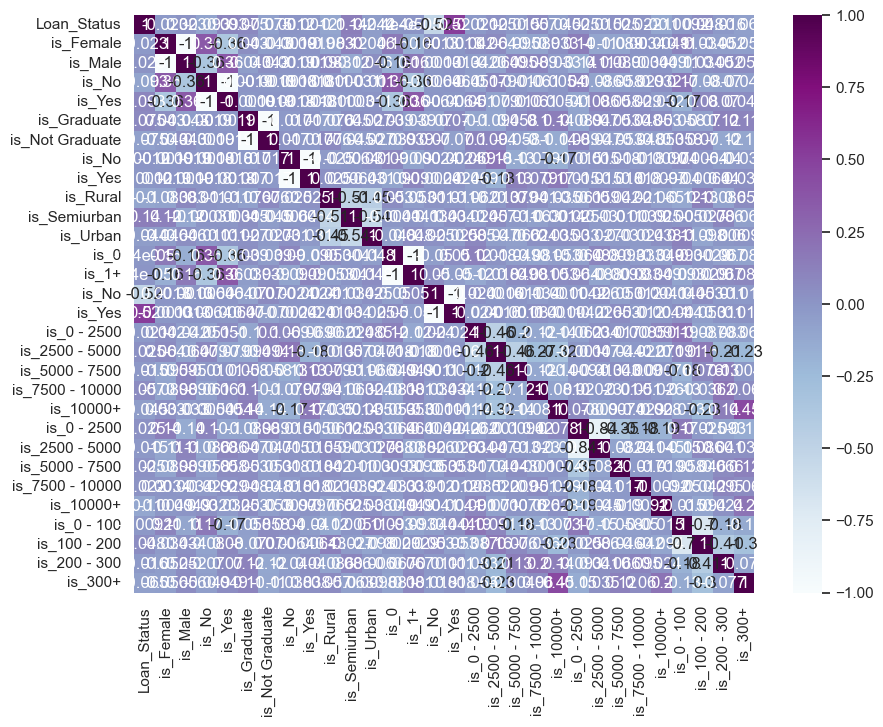

In [68]:
#Testing for Correlation (Multicollinearity)
corr_var=df.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [69]:
df.head()

,Loan_Status,is_Female,is_Male,is_No,is_Yes,is_Graduate,is_Not Graduate,is_No,is_Yes,is_Rural,...,is_10000+,is_0 - 2500,is_2500 - 5000,is_5000 - 7500,is_7500 - 10000,is_10000+,is_0 - 100,is_100 - 200,is_200 - 300,is_300+
1,0,0,1,0,1,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,1,0,1,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5,1,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [70]:
x,y = df.drop(['Loan_Status'], axis=1), df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 598, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, stratify=y)

In [72]:
y.value_counts()

1    412
0    186
Name: Loan_Status, dtype: int64

In [73]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred_lr = clf.predict(x_test)
acc_log_reg = round( clf.score(x_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')

82.5 percent


In [74]:
clf = SVC()
clf.fit(x_train, y_train)
y_pred_svc = clf.predict(x_test)
acc_svc = round( clf.score(x_test, y_test) * 100, 2)
print (str(acc_svc) + ' percent')

82.5 percent


In [75]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred_random = clf.predict(x_test)
acc_random = round( clf.score(x_test, y_test) * 100, 2)
print (str(acc_random) + ' percent')
print(x_train)

80.83 percent
     is_Female  is_Male  is_No  is_Yes  is_Graduate  is_Not Graduate  is_No  \
3            0        1      0       1            0                1      1   
484          0        1      0       1            1                0      1   
592          0        1      1       0            1                0      0   
25           0        1      0       1            1                0      0   
199          0        1      1       0            1                0      0   
..         ...      ...    ...     ...          ...              ...    ...   
72           0        1      1       0            1                0      1   
586          0        1      0       1            1                0      1   
450          0        1      0       1            0                1      1   
242          0        1      1       0            1                0      1   
306          1        0      1       0            1                0      1   

     is_Yes  is_Rural  is_Semiurban  

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred_random)
print(cm)
score = accuracy_score(y_test,y_pred_random)
print(score)

[[22 15]
 [ 8 75]]
0.8083333333333333


In [77]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.73      0.59      0.66        37
           1       0.83      0.90      0.87        83

    accuracy                           0.81       120
   macro avg       0.78      0.75      0.76       120
weighted avg       0.80      0.81      0.80       120



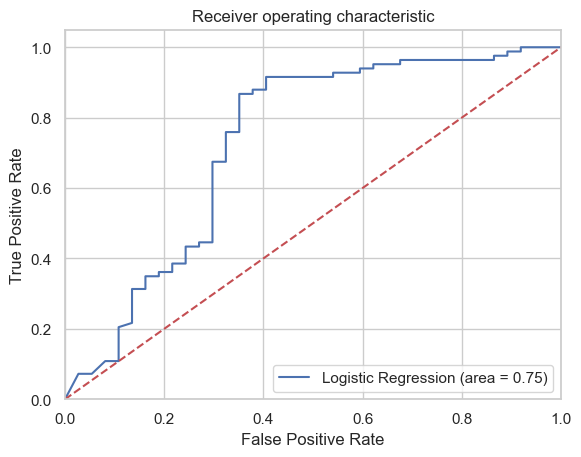

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()